In [1]:
from models import *
from datetime import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
import shutil
import os
from random import random

print("Tensorflow version: ", tf.__version__)
print("Numpy version: ", np.__version__)

excel_reports = ".\Excel reports"
saved_models = ".\Saved models"
trained_models = ".\Trained models"
tested_models = ".\Tested models"
temp = ".\Temp"

# Initiate parameters
ticker = 'hp'
period = "1wk" 
shuffle = False

eod_data_api = False
api_key = '631505e804ec58.42743136'

sentiment = True
# Sentiment types... APISentiment	VaderSentiment	CombinedVaderSentiment RobertaLargeSentiment #TwitterSentiment
sentiment_type = 'TwitterSentiment'
aggr_function = 'median'

formation_window = 3
target_window = 1

#Split Ratios
split_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.15
export_excels = False

#trade condition
condition = False

# EMA indicators
indicator1 = 5
indicator2 = 8
indicator3 = 21

# Period model is trained and tested
start_date = '2019-01-01'  
end_date = '2023-01-29'  

# Do not change
window_size = formation_window + 1

# training batches
batch_size_train = 6
batch_size_valid = 2

if sentiment == False:
    news_df = None
if sentiment_type == 'TwitterSentiment':
    twitter = True
else:
    twitter = False
    
# Print stuffs
print("\nwindow size: ", window_size)
print("formation_window: ", formation_window)
print("target_window: ", target_window)
print("chart period: ", period)


# #Delete folders
# shutil.rmtree(excel_reports)
# shutil.rmtree(saved_models)
# shutil.rmtree(trained_models)
# shutil.rmtree(tested_models)
# shutil.rmtree(temp)

# Create folder, if exist pass exception
try:
    os.mkdir("Excel reports")
    os.mkdir("Saved models")
    os.mkdir("Trained models")
    os.mkdir("Tested models")
    os.mkdir("Temp")
except:
    pass


Tensorflow version:  2.9.1
Numpy version:  1.23.1

window size:  4
formation_window:  3
target_window:  1
chart period:  1wk


In [2]:
if sentiment == True:

    from sentiment import GetNews

    GetNewsAPI = GetNews()

    GetNewsAPI.fit(ticker=ticker, start_date=start_date, end_date=end_date,
                   n_news=1000, token=api_key, offset=0, export_excel=True, twitter=twitter)
    news_df = GetNewsAPI.transform()
news_df.head()


c:\Users\z0040jeb\Desktop\MachineLearning\Data Science\VSCode\04_StockPrediction\04_stockprediction\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--------> GetNews completed



,Date,TwitterSentiment
0,2023-01-29,0.3185
1,2023-01-28,0.6369
2,2023-01-26,0.6369
3,2023-01-25,0.6369
4,2023-01-23,0.6369


In [3]:
from transformers_preprocess import PullData

GetData = PullData()

print("ticker: ",ticker)
print("EOD api: ",eod_data_api)

GetData.fit(ticker=ticker,
            start_date=start_date,
            end_date=end_date,
            interval=period,  # 1wk
            progress=False,
            condition=condition,
            form_window=formation_window,
            target_window=target_window,
            timeperiod1=indicator1,#6
            timeperiod2=indicator2,#12
            timeperiod3=indicator3,#24
            export_excel=export_excels,
            excel_path=excel_reports,
            listed_conditions=None,
            sentiment=sentiment,
            sentiment_type=sentiment_type, #sentiment_type
            news_df=news_df,
            chart_period=period,
            sentiment_aggr=aggr_function,
            )

data_prep = GetData.transform()

# Validation
if window_size != (formation_window + 1):
    raise Exception(
        f"Error - window_size ({window_size}) must be equal to sum of formation_window ({formation_window}) and value 1.")
data_prep.head(18)


ticker:  hp
EOD api:  False
initial shape:  (226, 6)


,Date,Open,High,Low,Close,EMA5,EMA8,EMA21,TwitterSentiment,trades
0,2018-12-31 00:00:00,47.910000,49.430000,46.049999,49.000000,53.307999,54.3,55.603333,0.0,1
1,2019-01-07 00:00:00,49.220001,54.630001,48.900002,53.430000,53.307999,54.3,55.603333,0.0,1
2,2019-01-14 00:00:00,52.990002,54.529999,51.770000,54.139999,53.307999,54.3,55.603333,0.0,1
0,Month,53.310001,53.740002,50.000000,53.419998,53.307999,54.3,55.603333,0.0,1
1,2019-01-07 00:00:00,49.220001,54.630001,48.900002,53.430000,53.307999,54.3,55.603333,0.0,2
2,2019-01-14 00:00:00,52.990002,54.529999,51.770000,54.139999,53.307999,54.3,55.603333,0.0,2
3,2019-01-21 00:00:00,53.310001,53.740002,50.000000,53.419998,53.307999,54.3,55.603333,0.0,2
0,Month,52.410000,58.279999,51.590000,56.549999,53.307999,54.3,55.603333,0.0,2
2,2019-01-14 00:00:00,52.990002,54.529999,51.770000,54.139999,53.307999,54.3,55.603333,0.0,3
3,2019-01-21 00:00:00,53.310001,53.740002,50.000000,53.419998,53.307999,54.3,55.603333,0.0,3


In [4]:
####################################################################

from transformers_preprocess import NormalizeData

NormalizeData = NormalizeData()

NormalizeData.fit(window_size=window_size, shuffle=shuffle, debug=False,
                  export_excel=export_excels, excel_path=excel_reports, sentiment=sentiment)

data_normalized, Dates = NormalizeData.transform(data_prep)
data_normalized.head(8)
# Get only forecasts for model testing
# x_valid_x = data_normalized[['maxv','minv']].copy() #extreme values for reverting normalization
# x_valid = data_normalized.iloc[:,:-2].copy() #dataset for forecast
#Dates



Dataframe shape:  (840, 10)
Number of formations:  210
--------> NormalizeData completed



,Open,High,Low,Close,EMA5,EMA8,EMA21,TwitterSentiment,maxv,minv
0,0.194696,0.353803,0.000000,0.308793,0.759735,0.863573,1.000000,0.0,55.603333,46.049999
1,0.331822,0.898116,0.298325,0.772505,0.759735,0.863573,1.000000,0.0,55.603333,46.049999
2,0.726448,0.887648,0.598744,0.846825,0.759735,0.863573,1.000000,0.0,55.603333,46.049999
0,0.759944,0.804955,0.413468,0.771458,0.759735,0.863573,1.000000,0.0,55.603333,46.049999
1,0.034115,0.610874,0.000000,0.482942,0.469936,0.575693,0.714641,0.0,58.279999,48.900002
2,0.436034,0.600213,0.305970,0.558635,0.469936,0.575693,0.714641,0.0,58.279999,48.900002
3,0.470149,0.515992,0.117271,0.481876,0.469936,0.575693,0.714641,0.0,58.279999,48.900002
0,0.374200,1.000000,0.286780,0.815565,0.469936,0.575693,0.714641,0.0,58.279999,48.900002


In [5]:
####################################################################

from training import SplitData

SplitData = SplitData()

SplitData.fit(split_ratio=split_ratio, window_size=window_size,
              dates=Dates, debug=False, export_excel=export_excels, excel_path=excel_reports, sentiment=sentiment,validation_set=validation_ratio, test_set=test_ratio)

x_train, x_valid, x_test, x_train_x, x_valid_x, x_test_x,_ = SplitData.transform(data_normalized)
# x_train.head(25)



DF Shape:  (840, 10)
train_split split:  588
validation split:  128
total validation windows:  63.0

Split train ratio: 70 %
Split validation ratio: 15 %
Split test ratio: 15 %

train period: 2018-12-31 - 2021-11-01
valid period: 2021-10-25 - 2022-06-13
test period: 2022-06-06 - 2023-01-16

Total Windows:  210.0
x_train windows:  147.0
x_valid windows:  32.0
x_test windows:  31.0
--------> SplitData completed



In [6]:
from training import GetTensoredDataset

GetTensoredDataset = GetTensoredDataset()

GetTensoredDataset.fit(window_size=window_size, batch_size=batch_size_train, train=True, debug=False)

x_train_tensors, _ = GetTensoredDataset.transform(x_train)

# c = 0
# for batch in x_train_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break


--------> GetTensoredDataset completed



In [7]:
from training import GetTensoredDataset

GetTensoredValidDataset = GetTensoredDataset()

GetTensoredValidDataset.fit(
    window_size=window_size, batch_size=batch_size_valid, train=False, debug=False)

x_valid_tensors, _ = GetTensoredValidDataset.transform(x_valid)
x_test_tensors, labels = GetTensoredValidDataset.transform(x_test)
# for batch in x_valid_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break


--------> GetTensoredDataset completed

--------> GetTensoredDataset completed



<b>Model Training</b>

In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

datetime_ = datetime.today().date()
number = int(random()*10000)
model_name_ = f'{ticker}_model_{datetime_}_{number}.h5'
model_name = f'{saved_models}/{model_name_}'

early_stopping = EarlyStopping(
    monitor='val_loss', patience=6, mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=10e-15,
                              verbose=0)

model_checkpoint = ModelCheckpoint(monitor='val_loss',
                                   filepath=model_name,
                                   save_best_only=True)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true*y_pred, 0),
                    penalty * tf.square(y_true-y_pred),
                    tf.square(y_true - y_pred)
                    )

    return(tf.reduce_mean(loss, axis=-1))


tf.keras.losses.sign_penalty = sign_penalty


Bellow code is used to find the best model architecture, recommended to use cloud computing

In [9]:
# from testing import get_models,optimize
# from datetime import datetime
# start_time = datetime.now().strftime("%H:%M:%S")
# start = datetime.now()
# print("Training started at ",start_time)
# tf.random.set_seed(7788)
# np.random.seed(7788)

# # #Permutation testing
# # num_layers = 2
# # min, max = 2, 4
# # node_step_size = 2
# # node_options = list(range(min, max + 1, node_step_size))
# # two_layer_possibilities = [node_options, node_options]
# # layer_node_permutations  = list(itertools.product(*two_layer_possibilities))

# f_df = pd.DataFrame()

# for layer in range(7,8):
#     progress_time = datetime.now().strftime("%H:%M:%S")
#     print("\n------ > Layer: ",layer)
#     print("Layer loop started: ",progress_time)

#     all_models, names = get_models(num_layers=layer, min=2, max=4, node_step_size=2, features=x_train.shape[1])

#     progress_time = datetime.now().strftime("%H:%M:%S")
#     print("Models: ",len(all_models))
#     print("Models constructed: ",progress_time)
    
#     optimizing_df = optimize(models=all_models,X_train=x_train_tensors,X_valid=x_valid_tensors,X_test=x_valid,labels=labels,epochs=1000,verbose=0,window_size=window_size,callbacks=callbacks,layer=layer,ticker=ticker,excel_path=tested_models)
# # optimizing_df
#     #f_df = f_df.append(optimizing_df)
    
# end_time = datetime.now().strftime("%H:%M:%S")
# end = datetime.now()
# print("\nTraining ended at ",end_time) 
# print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")

Get Model

In [10]:
from datetime import datetime
start_time = datetime.now().strftime("%H:%M:%S")
start = datetime.now()
print("Training started at ",start_time)

tf.random.set_seed(7788)
np.random.seed(7788)
features = x_train.shape[1]

print(f"Model training - {str.upper(ticker)} \n")
def general_model(features: int):
    model = tf.keras.models.Sequential([

        tf.keras.layers.Conv1D(filters=1, kernel_size=1,
                               strides=1, padding="same",
                               activation=tf.nn.selu,
                               input_shape=[None, features]),
        # tf.keras.layers.Conv1D(filters=16, kernel_size=1,
        #                        strides=1, padding="same",
        #                        activation=tf.nn.selu,
        #                        #input_shape=[None, 7]
        #                        ),
        # tf.keras.layers.Conv1D(filters=32, kernel_size=10,
        #                        strides=1, padding="same",
        #                        activation=tf.nn.selu,
        #                        #input_shape=[None, 7]
        #                        ),

        tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(3, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(3)),
        tf.keras.layers.Dense(4, activation=tf.nn.selu),
        tf.keras.layers.Dense(3, activation=tf.nn.selu),
        tf.keras.layers.Dense(2, activation=tf.nn.selu),
        tf.keras.layers.Dense(1, activation=tf.nn.relu),
    ])
    return model
    
model = general_model(features)


optimizer2 = tf.keras.optimizers.Adam(
            learning_rate=0.00007, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
optimizer5 = tf.keras.optimizers.Adagrad(
    learning_rate=0.0006, initial_accumulator_value=5, epsilon=1e-07, name='Adagrad')

model.compile(loss=sign_penalty,
              optimizer=optimizer5
              )

model.fit(x_train_tensors, epochs=1000, callbacks=[callbacks], validation_data=x_valid_tensors,verbose=1)


end_time = datetime.now().strftime("%H:%M:%S")
end = datetime.now()
print("\nTraining ended at ",end_time) 
print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")



Training started at  22:09:26
Model training - HP 

Epoch 1/1000
25/25 [==============================] - 11s 185ms/step - loss: 0.5231 - val_loss: 0.7145 - lr: 6.0000e-04
Epoch 2/1000
25/25 [==============================] - 1s 23ms/step - loss: 0.5004 - val_loss: 0.6812 - lr: 6.0000e-04
Epoch 3/1000
25/25 [==============================] - 1s 22ms/step - loss: 0.4744 - val_loss: 0.6524 - lr: 6.0000e-04
Epoch 4/1000
25/25 [==============================] - 1s 40ms/step - loss: 0.4465 - val_loss: 0.6166 - lr: 6.0000e-04
Epoch 5/1000
25/25 [==============================] - 1s 23ms/step - loss: 0.4185 - val_loss: 0.5779 - lr: 6.0000e-04
Epoch 6/1000
25/25 [==============================] - 0s 19ms/step - loss: 0.3905 - val_loss: 0.5395 - lr: 6.0000e-04
Epoch 7/1000
25/25 [==============================] - 0s 13ms/step - loss: 0.3634 - val_loss: 0.5015 - lr: 6.0000e-04
Epoch 8/1000
25/25 [==============================] - 0s 15ms/step - loss: 0.3385 - val_loss: 0.4680 - lr: 6.0000e-04
Ep

In [11]:
from functions import model_forecast
forecast = model_forecast(model, x_test, window_size=window_size, debug=False)

from transformers_preprocess import ReverseNormalization

ReverseNormalization = ReverseNormalization()

ReverseNormalization.fit(forecasts=forecast, labels=labels,
                         x_test=x_test, x_test_x=x_test_x, window_size=window_size, debug=False,
                         sentiment=sentiment,sentiment_type=sentiment_type)

df = ReverseNormalization.transform()
df.head(8)


31/31 [==============================] - 2s 3ms/step
--------> ReverseNormalization completed



,Open,High,Low,Close,EMA5,EMA8,EMA21,labels,prediction,TwitterSentiment
In,,,,,,,,,,
0,51.200001,54.590000,47.930000,49.549999,49.151339,48.035346,42.815336,NaN,NaN,-0.06755
1,47.560001,48.020000,38.040001,38.860001,45.720893,45.996380,42.455760,NaN,NaN,0.10120
2,39.720001,44.540001,37.340000,43.939999,45.127261,45.539407,42.590691,NaN,NaN,0.04590
3,44.900002,45.799999,41.410000,43.509998,45.720893,45.996380,42.455760,45.799999,48.177495,0.10120
4,47.560001,48.020000,38.040001,38.860001,45.720893,45.996380,42.455760,NaN,NaN,0.10120
5,39.720001,44.540001,37.340000,43.939999,45.127261,45.539407,42.590691,NaN,NaN,0.04590
6,44.900002,45.799999,41.410000,43.509998,44.588174,45.088427,42.674264,NaN,NaN,0.01260
7,42.150002,43.470001,38.029999,42.980000,45.127261,45.539407,42.590691,43.470001,43.591577,0.04590


In [12]:
from final_evaluation import GetFinalDataframe

GetFinalDataframe = GetFinalDataframe()

GetFinalDataframe.fit(dates=Dates,
                      x_test=x_test,
                      sentiment=sentiment,
                      sentiment_type=sentiment_type)

reversed_df = GetFinalDataframe.transform(df)
#reversed_df.head(10)


--------> GetFinalDataframe



In [13]:
from final_evaluation import GetModelPerformance
#print(f"Window size: {window_size} \n")
print(f"ticker: {str.upper(ticker)}\n")
GetModelPerformance = GetModelPerformance()

acceptance = 1
penalization = 0.5

GetModelPerformance.fit(acceptance=acceptance,
                        penalization=penalization,
                        entry_candle='Current Open',#Current Open
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports,
                        sentiment=sentiment)

trades_df = GetModelPerformance.transform(reversed_df)
#trades_df = trades_df.sort_values('Datetime',ascending=True)

#trades_df.tail(16)

ticker: HP

Formations:  31
period: 2022-06-06 - 2023-01-16
Entry Candle:  Current Open

Total Trades:  14
Profit Trades:  13
Loss Trades:  1

Win Ratio: 93.0 %
Loss Ratio: 7 %

Trade nr with exact TP:  11
Ratio of exact TP: 78.57 %

Average profit per trade:  443

Gross profit:  6196
Gross loss:  -310

Net profit:  5886


In [14]:
trades_df[trades_df['profit']<0]

,Open,High,Low,Close,EMA5,EMA8,EMA21,labels,prediction,TwitterSentiment,Datetime,profit,trade
In,,,,,,,,,,,,,
0,51.200001,54.590000,47.930000,49.549999,49.151339,48.035346,42.815336,nn,nn,-0.06755,2022-06-06,-1.390003,1
1,47.560001,48.020000,38.040001,38.860001,45.720893,45.996380,42.455760,nn,nn,0.10120,2022-06-13,-1.390003,1
2,39.720001,44.540001,37.340000,43.939999,45.127261,45.539407,42.590691,nn,nn,0.04590,2022-06-20,-1.390003,1
3,44.900002,45.799999,41.410000,43.509998,45.720893,45.996380,42.455760,45.799999,47.677495,0.00000,2022-06-21,-1.390003,1


In [15]:
trade = 1
budget = 10000
entry_candle = 'Current Open'
df = trades_df.head(3)


Trade:  1
Window size:  4
Period: 2022-06-06 - 2022-06-20

Budget:  10000

Entry price:  44.9
Label (target):  45.8
Model prediction:  47.68
Market Change: -1.39 $
Profit: -309.58 $


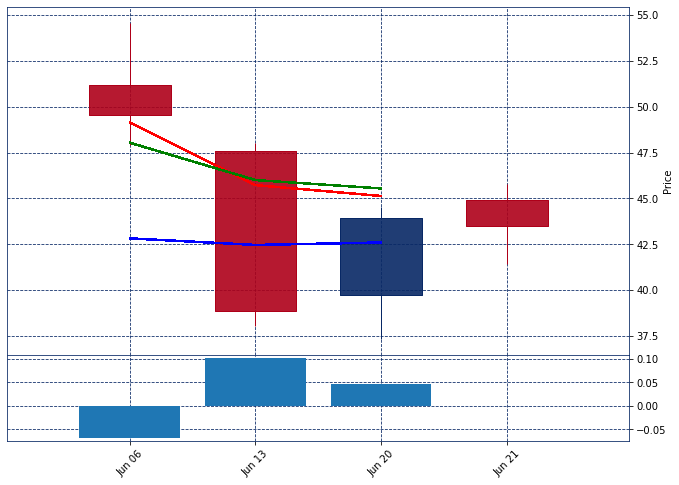

,Open,High,Low,Close,EMA5,EMA8,EMA21,labels,prediction,TwitterSentiment,Datetime,profit,trade
In,,,,,,,,,,,,,
0,51.200001,54.590000,47.930000,49.549999,49.151339,48.035346,42.815336,nn,nn,-0.06755,2022-06-06,-1.390003,1
1,47.560001,48.020000,38.040001,38.860001,45.720893,45.996380,42.455760,nn,nn,0.10120,2022-06-13,-1.390003,1
2,39.720001,44.540001,37.340000,43.939999,45.127261,45.539407,42.590691,nn,nn,0.04590,2022-06-20,-1.390003,1
3,44.900002,45.799999,41.410000,43.509998,45.720893,45.996380,42.455760,45.799999,47.677495,0.00000,2022-06-21,-1.390003,1


In [16]:
#trade = 4
from plotting import PlotTrade

df = PlotTrade(trade=trade,trades_df=trades_df,window_size=window_size,entry_candle=entry_candle,
budget=budget,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)
trade += 1
df


In [17]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle=entry_candle,#"Current Open"
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)
trades_df_final = trades_df_final.sort_values('Datetime', ascending=True)
trades_df_final.tail(5)

--------> GetPerformanceReport completed



,Open,High,Low,Close,EMA5,EMA8,EMA21,labels,prediction,TwitterSentiment,Datetime,profit,trade,Entry,Performance
51,47.439999,50.009998,45.740002,48.939999,48.500917,48.188417,45.969824,50.009998,48.855703,0.00000,2022-12-13,1.415704,13,47.439999,299.0
52,48.900002,49.389999,44.779999,45.799999,47.738205,47.855453,46.533826,nn,nn,0.19310,2023-01-02,1.314467,14,nn,nn
53,47.889999,51.139999,46.349998,50.639999,48.705470,48.474241,46.907114,nn,nn,0.17725,2023-01-09,1.314467,14,nn,nn
54,51.020000,51.250000,46.130001,46.919998,48.110313,48.128854,46.908286,nn,nn,0.14635,2023-01-16,1.314467,14,nn,nn
55,47.139999,50.349998,46.090000,49.189999,48.110313,48.128854,46.908286,50.349998,48.454466,0.00000,2023-01-17,1.314467,14,47.139999,279.0


<b>Plot Chart With Labels and Predictions</b>

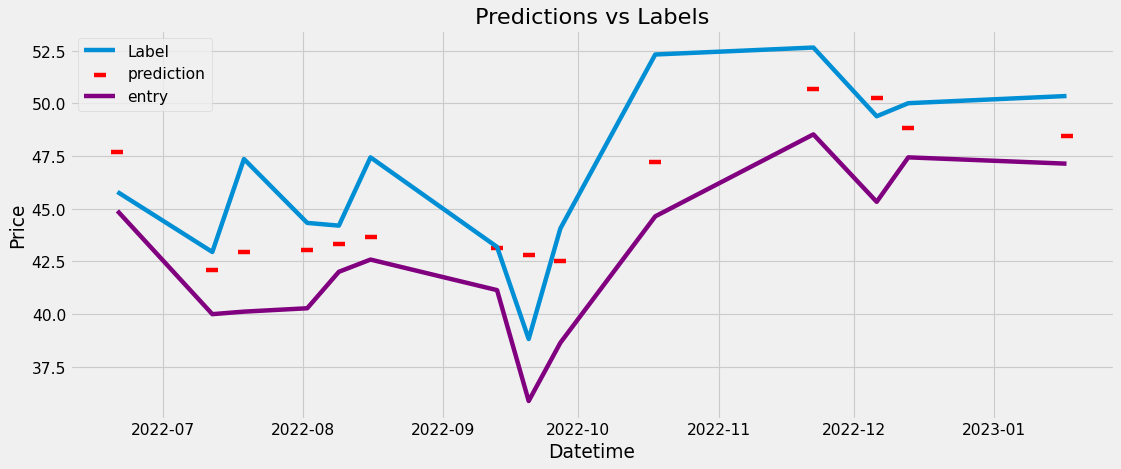

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
figure(figsize=(15, 6), dpi=80)

df_plot = trades_df_final[['Datetime','labels','prediction','Entry']]
df_plot = df_plot[df_plot.labels != 'nn']

x1 = df_plot['labels']
x2 = df_plot['prediction']
entry = df_plot['Entry']
y = df_plot['Datetime']

# plot lines
plt.plot(y, x1, label = "Label") #,s=200,marker='*'
plt.scatter(y, x2, label = "prediction",color='red', s=100,marker='_')
plt.plot(y, entry, label = "entry",color='purple')#,color='blue', s=100,marker=0
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Predictions vs Labels')
plt.legend()
plt.show()

<b>Export dataframe with all variables</b>

In [19]:
import shutil 
# ticker period eod_data_api api_key sentiment sentiment_type aggr_function formation_window 
# target_window split_ratio test_ratio validation_ratio condition 
# indicator1 indicator2 indicator3 window_size twitter start_date end_date batch_size_train batch_size_valid shuffle entry_candle
today = datetime.today().date()

shutil.copy(f'{model_name}', f'./Temp/{model_name_}')

variables_dict = \
{
'model_name':[model_name_],
'Date':[today],
'ticker':[ticker],
'period':[period],
'eod_data_api':[eod_data_api],
'api_key':[api_key],
'sentiment':[sentiment],
'sentiment_type':[sentiment_type],
'aggr_function':[aggr_function],
'formation_window':[formation_window],
'target_window':[target_window],
'split_ratio':[split_ratio],
'test_ratio':[test_ratio],
'validation_ratio':[validation_ratio],
'condition':[condition],
'indicator1':[indicator1],
'indicator2':[indicator2],
'indicator3':[indicator3],
'window_size':[window_size],
'formation_window':[formation_window],
'twitter':[twitter],
'start_date':[start_date],
'end_date':[end_date],
'batch_size_train':[batch_size_train],
'batch_size_valid':[batch_size_valid],
'shuffle':[shuffle],
'entry_candle':[entry_candle],
'excel_reports':[excel_reports],
'acceptance':[acceptance],
'penalization':[penalization],
}

x_test.to_csv(f'./Temp/{ticker}_test_data.csv')
x_test_x.to_csv(f'./Temp/{ticker}_x_test_x.csv')
test_start = len(Dates)-x_test.shape[0]
Dates_test = Dates[test_start:]
Dates_test.to_csv(f'./Temp/{ticker}_dates_test.csv')
Dates.to_csv(f'./Temp/{ticker}_Dates.csv')
df = pd.DataFrame(variables_dict).transpose()
df.to_csv(f'./Temp/{ticker}_variables_df.csv')
df


,0
model_name,hp_model_2023-02-02_2218.h5
Date,2023-02-02
ticker,hp
period,1wk
eod_data_api,False
api_key,631505e804ec58.42743136
sentiment,True
sentiment_type,TwitterSentiment
aggr_function,median
formation_window,3


In [24]:
from final_evaluation import MakeSinglePrediction

#model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

MakeSinglePrediction = MakeSinglePrediction()

fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date="2019-03-18",
                        end_date="2023-02-02",
                        interval=period, #1wk
                        progress=False,
                        condition=condition,
                        timeperiod1=indicator1,
                        timeperiod2=indicator2,
                        timeperiod3=indicator3,
                        debug=False,
                        budget=10000,
                        penalization=0,
                        acceptance=0,
                        entry_candle='Current Close',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type = sentiment_type,
                        sentiment_aggr = aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.tail(formation_window)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method
final_trade_formation.tail()


,Date,Open,High,Low,Close,EMA5,EMA8,EMA21,TwitterSentiment
1,2023-01-16,51.020000,51.250000,46.130001,46.919998,48.110313,48.128854,46.908286,0.173833
2,2023-01-23,47.139999,50.349998,46.090000,49.189999,48.470208,48.364664,47.115714,0.511400
3,2023-01-30,48.169998,49.779999,44.910000,46.720001,47.886806,47.999183,47.079740,0.022550



Ticker:  hp
1/1 [==============================] - 1s 1s/step

Entry candle (Current Close)

Budget:  10000

Entry price:  46.72
Prediction:  49.0
Expected Market move:  2.28
Expected Profit:  486.94


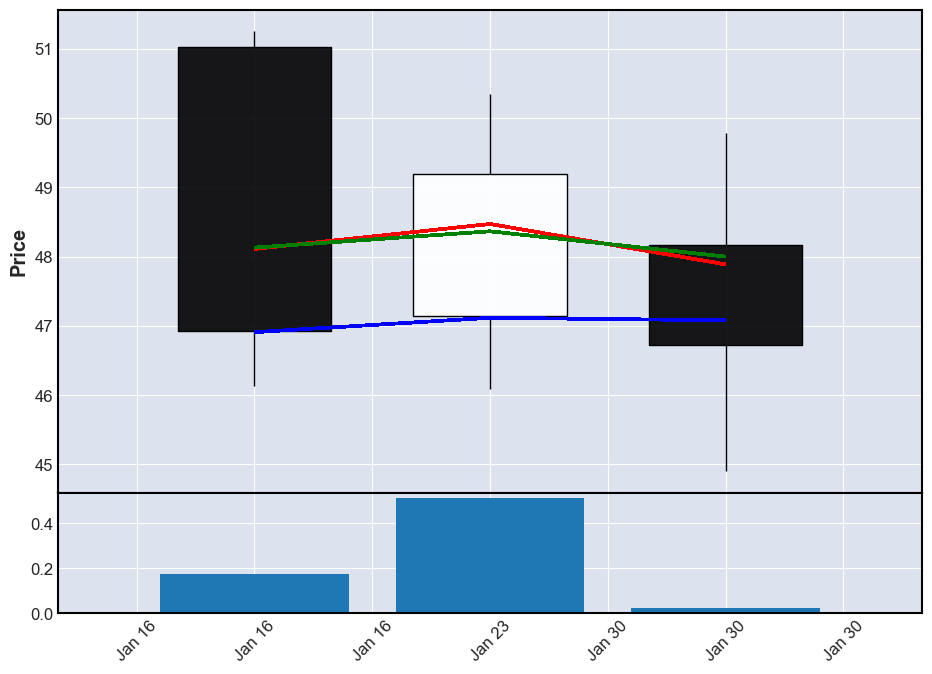

In [25]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)


In [89]:
x_test

,Open,High,Low,Close,EMA5,EMA8,EMA21,CombinedVaderSentiment
885,0.513623,0.862029,0.496812,0.831884,0.608580,0.535679,0.225974,0.98750
886,0.860869,0.920580,0.673623,0.802319,0.673160,0.594933,0.278369,0.30685
887,0.803478,1.000000,0.613913,0.707826,0.684715,0.620020,0.317411,1.33400
888,0.592464,0.619130,0.040580,0.088116,0.485849,0.501819,0.296566,1.22220
889,0.137971,0.417391,0.000000,0.382609,0.673160,0.594933,0.278369,0.30685
...,...,...,...,...,...,...,...,...
1040,0.107317,0.318293,0.000000,0.191463,0.208998,0.224741,0.501891,0.00000
1041,0.228049,0.356098,0.015854,0.331707,0.249901,0.248512,0.486419,0.00000
1042,0.285366,0.613415,0.274390,0.503659,0.334487,0.305211,0.487987,0.00000
1043,0.562195,0.763415,0.540244,0.760976,0.476650,0.406492,0.512804,0.00000
